In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv('data\Blood data.csv')

In [3]:
df.head()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,1
1,3,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,1
2,5,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,1
3,7,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1,1
4,10,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0,1


In [4]:
df.shape

(2000, 15)

In [5]:
df.head(20)

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,1
1,3,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,1
2,5,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,1
3,7,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1,1
4,10,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0,1
5,11,8.58,0.13,70,28,1,NaN,0,48527,26178,46.0,1,1,1,1
6,12,12.77,0.10,35,17,0,NaN,0,22500,43040,382.0,3,1,0,1
7,13,16.40,0.45,31,50,0,NaN,1,25639,46997,41.0,3,0,1,1
8,16,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0,1
9,17,11.98,0.06,65,28,1,NaN,0,29834,45217,377.0,2,0,0,1


In [6]:
df.drop(['Patient_Number','Genetic_Pedigree_Coefficient','BMI','Physical_activity','salt_content_in_the_diet'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Level_of_Hemoglobin            2000 non-null   float64
 1   Age                            2000 non-null   int64  
 2   Sex                            2000 non-null   int64  
 3   Pregnancy                      442 non-null    float64
 4   Smoking                        2000 non-null   int64  
 5   alcohol_consumption_per_day    1758 non-null   float64
 6   Level_of_Stress                2000 non-null   int64  
 7   Chronic_kidney_disease         2000 non-null   int64  
 8   Adrenal_and_thyroid_disorders  2000 non-null   int64  
 9   donate                         2000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 156.4 KB


In [8]:
df['donate'] = df['donate'].replace({0: 1, 1: 0})

In [9]:
df.donate.value_counts()

donate
0    1121
1     879
Name: count, dtype: int64

In [10]:
df.Sex.value_counts()

Sex
0    1008
1     992
Name: count, dtype: int64

In [11]:
df['alcohol_consumption_per_day']

0         NaN
1        67.0
2       397.0
3       206.0
4        95.0
        ...  
1995    471.0
1996     82.0
1997     48.0
1998    379.0
1999    253.0
Name: alcohol_consumption_per_day, Length: 2000, dtype: float64

In [12]:
df['Pregnancy'].value_counts()

Pregnancy
0.0    243
1.0    199
Name: count, dtype: int64

In [13]:
df.isnull().sum()

Level_of_Hemoglobin                 0
Age                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
donate                              0
dtype: int64

In [14]:
df.isnull().mean()

Level_of_Hemoglobin              0.000
Age                              0.000
Sex                              0.000
Pregnancy                        0.779
Smoking                          0.000
alcohol_consumption_per_day      0.121
Level_of_Stress                  0.000
Chronic_kidney_disease           0.000
Adrenal_and_thyroid_disorders    0.000
donate                           0.000
dtype: float64

In [15]:
df.alcohol_consumption_per_day.fillna(df.alcohol_consumption_per_day.mean(),inplace=True)

In [16]:
df.loc[((df['Sex'] == 1) | (df['Sex'] == 0)) & (df['Pregnancy'].isnull()), 'Pregnancy'] = df['Sex'].map({0: -1, 1: 0})


In [17]:
df.isnull().sum()

Level_of_Hemoglobin              0
Age                              0
Sex                              0
Pregnancy                        0
Smoking                          0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
donate                           0
dtype: int64

In [18]:
df.isnull().mean()

Level_of_Hemoglobin              0.0
Age                              0.0
Sex                              0.0
Pregnancy                        0.0
Smoking                          0.0
alcohol_consumption_per_day      0.0
Level_of_Stress                  0.0
Chronic_kidney_disease           0.0
Adrenal_and_thyroid_disorders    0.0
donate                           0.0
dtype: float64

In [19]:
df_filtered = df[df['Sex'] == 1][['Sex', 'Pregnancy']]

print(df_filtered.value_counts())


Sex  Pregnancy
1    0.0          793
     1.0          199
Name: count, dtype: int64


In [20]:
df['Pregnancy'] = df['Pregnancy'].astype(int)

In [21]:
df.Pregnancy.value_counts()

Pregnancy
-1    1008
 0     793
 1     199
Name: count, dtype: int64

In [22]:
df.isnull().sum()

Level_of_Hemoglobin              0
Age                              0
Sex                              0
Pregnancy                        0
Smoking                          0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
donate                           0
dtype: int64

In [23]:
df

,Level_of_Hemoglobin,Age,Sex,Pregnancy,Smoking,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
0,11.28,34,1,1,0,251.008532,2,1,1,0
1,10.79,70,0,-1,0,67.000000,2,1,0,0
2,14.17,52,0,-1,0,397.000000,2,0,0,0
3,11.69,43,1,1,0,206.000000,3,1,1,0
4,14.56,40,0,-1,0,95.000000,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,10.81,44,1,1,0,471.000000,3,1,1,0
1996,10.44,38,0,-1,0,82.000000,2,0,0,0
1997,9.69,73,1,0,1,48.000000,3,0,1,0
1998,11.07,58,1,0,0,379.000000,2,0,0,0


<Axes: xlabel='donate'>

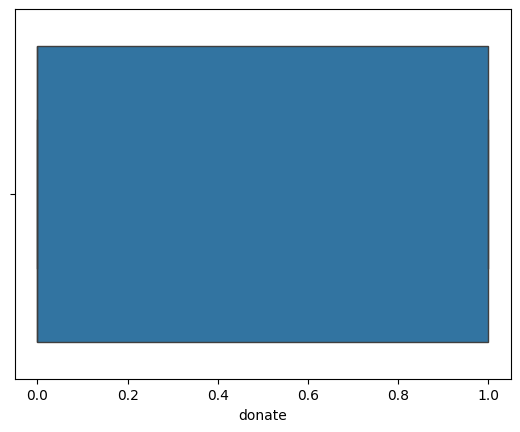

In [24]:
sns.boxplot(x='donate',data=df)

<Axes: xlabel='Level_of_Hemoglobin'>

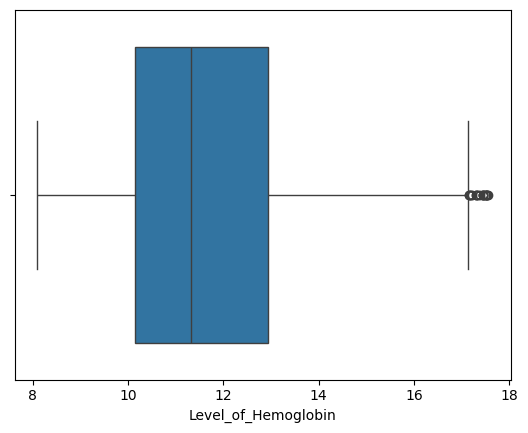

In [25]:
sns.boxplot(x='Level_of_Hemoglobin',data=df)

In [26]:
df['Level_of_Hemoglobin'].quantile([0,0.95])

0.00     8.10
0.95    16.01
Name: Level_of_Hemoglobin, dtype: float64

In [27]:
low,high=df['Level_of_Hemoglobin'].quantile([0,0.95])
sub=df['Level_of_Hemoglobin'].between(low,high)
print(sub)
df=df[sub]

0       True
1       True
2       True
3       True
4       True
        ... 
1995    True
1996    True
1997    True
1998    True
1999    True
Name: Level_of_Hemoglobin, Length: 2000, dtype: bool


<Axes: xlabel='Level_of_Hemoglobin'>

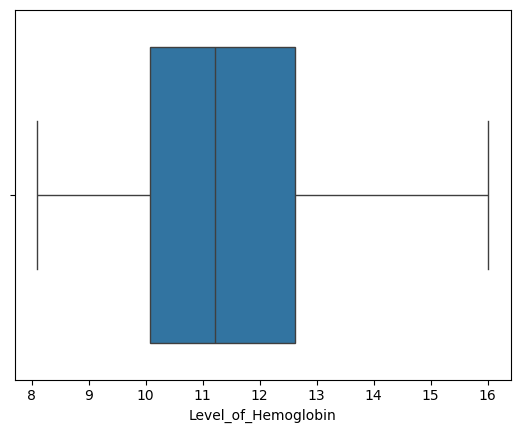

In [28]:
sns.boxplot(x='Level_of_Hemoglobin',data=df)

In [29]:
Q1 =df['Pregnancy'].quantile(0.25)
Q3 =df['Pregnancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df['Pregnancy'][(df['Pregnancy'] < lower_bound) | (df ['Pregnancy']> upper_bound)].dropna()
print("Lower Boundaries: \n", lower_bound)
print("Upper Boundaries: \n", upper_bound)
print("Outliers: \n", outliers)

Lower Boundaries: 
 -2.5
Upper Boundaries: 
 1.5
Outliers: 
 Series([], Name: Pregnancy, dtype: int32)


In [30]:
min_Outliers = np.min(lower_bound)
print(min_Outliers)

-2.5


In [31]:
max_Outliers = np.max(upper_bound)
print(max_Outliers)

1.5


<Axes: xlabel='Pregnancy'>

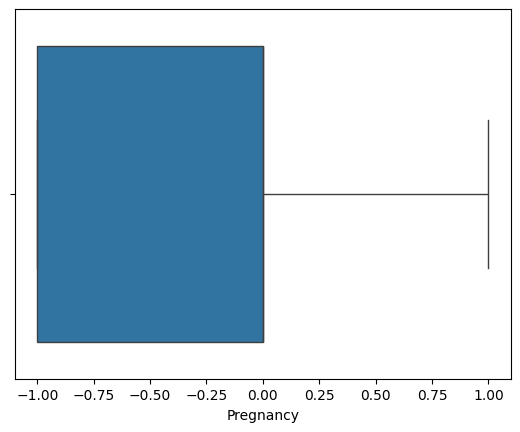

In [32]:
sns.boxplot(x='Pregnancy',data=df)

In [33]:
df.corr()

,Level_of_Hemoglobin,Age,Sex,Pregnancy,Smoking,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
Level_of_Hemoglobin,1.000000,-0.154009,-0.367915,-0.390050,0.000517,0.001647,0.024377,0.029181,-0.010757,-0.036708
Age,-0.154009,1.000000,0.040221,-0.116876,0.028557,0.009467,0.010589,-0.045732,-0.012985,0.034290
Sex,-0.367915,0.040221,1.000000,0.900985,0.008606,0.005632,-0.007249,0.040677,0.002422,-0.099981
Pregnancy,-0.390050,-0.116876,0.900985,1.000000,-0.028899,0.016074,-0.004050,0.038183,0.002665,-0.093663
Smoking,0.000517,0.028557,0.008606,-0.028899,1.000000,0.000898,-0.020699,-0.018379,0.017631,0.003332
alcohol_consumption_per_day,0.001647,0.009467,0.005632,0.016074,0.000898,1.000000,0.023004,0.031332,-0.003301,-0.015736
Level_of_Stress,0.024377,0.010589,-0.007249,-0.004050,-0.020699,0.023004,1.000000,0.019302,-0.015218,-0.003452
Chronic_kidney_disease,0.029181,-0.045732,0.040677,0.038183,-0.018379,0.031332,0.019302,1.000000,0.115718,-0.385978
Adrenal_and_thyroid_disorders,-0.010757,-0.012985,0.002422,0.002665,0.017631,-0.003301,-0.015218,0.115718,1.000000,-0.274753
donate,-0.036708,0.034290,-0.099981,-0.093663,0.003332,-0.015736,-0.003452,-0.385978,-0.274753,1.000000


<Axes: >

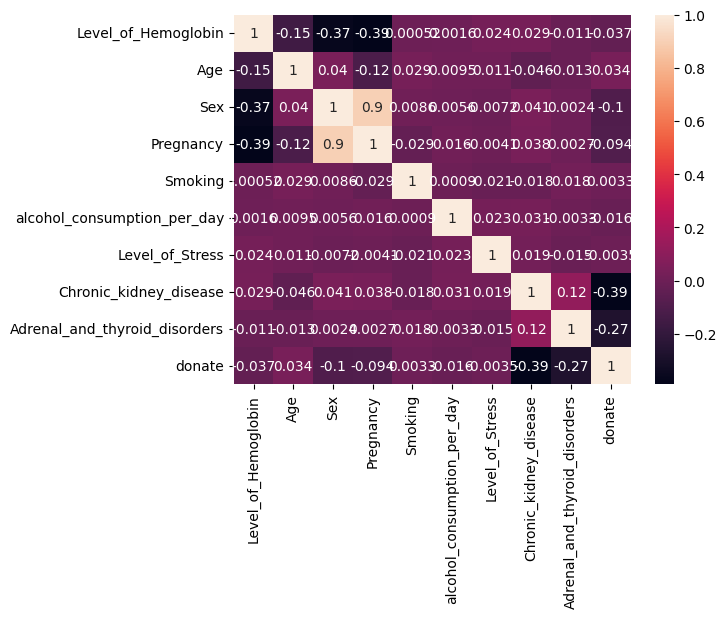

In [34]:
sns.heatmap(df.corr(),annot=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_54672\2517160127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['donate'])


<Axes: xlabel='donate', ylabel='Density'>

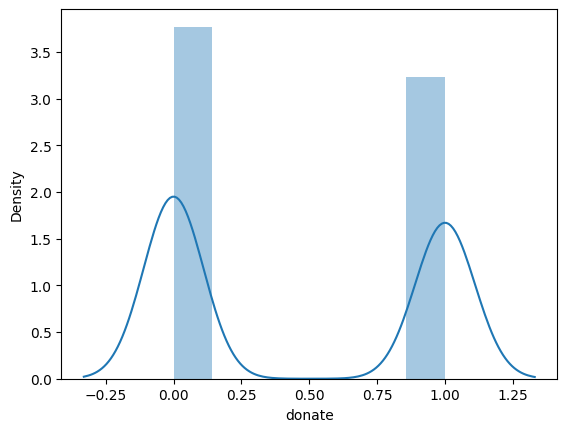

In [35]:
sns.distplot(df['donate'])

<Axes: xlabel='Smoking', ylabel='count'>

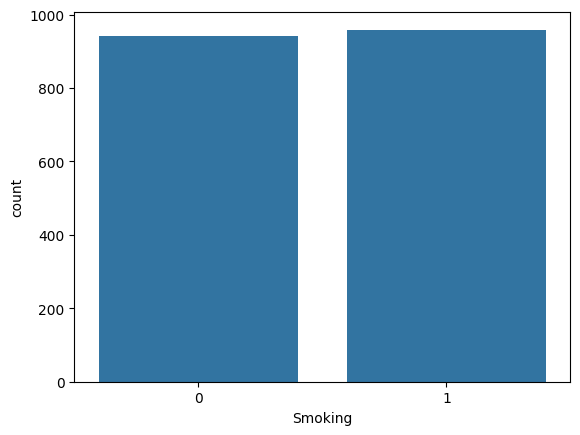

In [36]:
sns.countplot(x='Smoking',data=df)

In [37]:
df

,Level_of_Hemoglobin,Age,Sex,Pregnancy,Smoking,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
0,11.28,34,1,1,0,251.008532,2,1,1,0
1,10.79,70,0,-1,0,67.000000,2,1,0,0
2,14.17,52,0,-1,0,397.000000,2,0,0,0
3,11.69,43,1,1,0,206.000000,3,1,1,0
4,14.56,40,0,-1,0,95.000000,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,10.81,44,1,1,0,471.000000,3,1,1,0
1996,10.44,38,0,-1,0,82.000000,2,0,0,0
1997,9.69,73,1,0,1,48.000000,3,0,1,0
1998,11.07,58,1,0,0,379.000000,2,0,0,0


In [38]:
X = df.drop(columns=['donate'])  
y = df['donate']  

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standardized = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_standardized, y,train_size=0.75,test_size=0.25, random_state=42)

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf_classifier.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7163865546218487


In [45]:
rf_probs = rf_classifier.predict_proba(X_test)

rf_probs = rf_probs[:, 1]

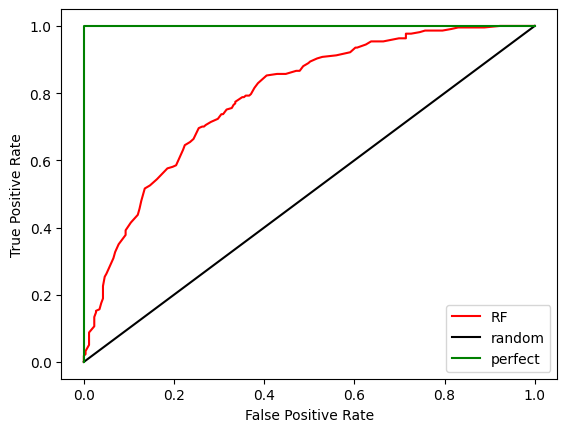

In [46]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, rf_probs)

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

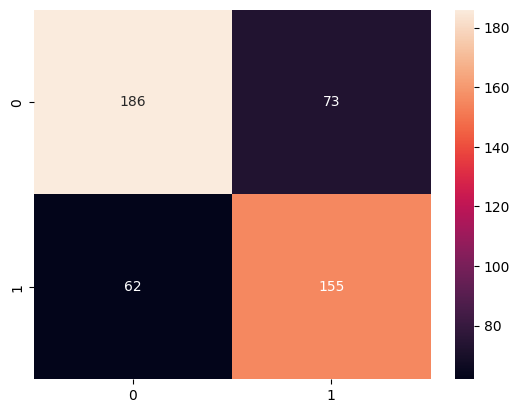

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.show()

In [48]:

print("Accuracy  :: %.3f"% accuracy_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))

print("\nClassification Report ::")
print("\n",classification_report(y_test, y_pred))

Accuracy  :: 0.716
Recall    :: 0.714
Precision :: 0.680
F1 Score  :: 0.697
AUC Score :: 0.790

Classification Report ::

               precision    recall  f1-score   support

           0       0.75      0.72      0.73       259
           1       0.68      0.71      0.70       217

    accuracy                           0.72       476
   macro avg       0.71      0.72      0.72       476
weighted avg       0.72      0.72      0.72       476



In [49]:
joblib.dump(rf_classifier, 'model1.joblib')
joblib.dump(scaler, 'scaler1.joblib')

['scaler1.joblib']